In [100]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rps.zip

--2020-07-15 04:03:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  8.16MB/s    in 47s     

2020-07-15 04:04:12 (6.55 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



In [ ]:
dataset_path = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [136]:
# making new base directory
os.mkdir(os.path.join('/tmp', 'rps-dataset'))

# add train and validation empty directories to rps-dataset directory
base_dir = '/tmp/rps-dataset'
os.mkdir(os.path.join(base_dir, 'train'))
os.mkdir(os.path.join(base_dir, 'validation'))

In [137]:
# setting up source dataset of RockPaperScissors
src_base_dir = '/tmp/rockpaperscissors'

src_rock = os.path.join(src_base_dir, 'rock')
print(src_rock)
src_paper = os.path.join(src_base_dir, 'paper')
print(src_paper)
src_scissors = os.path.join(src_base_dir, 'scissors')
print(src_paper)

/tmp/rockpaperscissors/rock
/tmp/rockpaperscissors/paper
/tmp/rockpaperscissors/paper


In [138]:
# split training and validation data using sklearn train_test_split
# Train size = .8 | Test size = .2

train_rock, val_rock = train_test_split(os.listdir(src_rock), test_size=.2)
train_paper, val_paper = train_test_split(os.listdir(src_paper), test_size=.2)
train_scissors, val_scissors = train_test_split(os.listdir(src_scissors), test_size=.2)

print(len(train_rock))
print(len(train_paper))
print(len(train_scissors))

print(len(val_rock))
print(len(val_paper))
print(len(val_scissors))

580
569
600
146
143
150


In [139]:
# make new directory for storing train and validation data
train_dir = '/tmp/rps-dataset/train'
validation_dir = '/tmp/rps-dataset/validation'

data_label = ['rock', 'paper', 'scissors']
dest_train = []
dest_val = []
for label in data_label:
  dest_train.append(os.path.join(train_dir, label))
  dest_val.append(os.path.join(validation_dir, label))

print(dest_train)
print(dest_val)
 
for path in dest_train:
  os.mkdir(path)

for path in dest_val:
  os.mkdir(path)

['/tmp/rps-dataset/train/rock', '/tmp/rps-dataset/train/paper', '/tmp/rps-dataset/train/scissors']
['/tmp/rps-dataset/validation/rock', '/tmp/rps-dataset/validation/paper', '/tmp/rps-dataset/validation/scissors']


In [140]:
# copy dataset from source directory to rps-dataset directory based on split training and test data filename

train_dataset = [train_rock, train_paper, train_scissors]
validation_dataset = [val_rock, val_paper, val_scissors]

src_dataset = [src_rock, src_paper, src_scissors]

for index, single_cat_data in enumerate(train_dataset):
  for data in single_cat_data:
    shutil.copy(os.path.join(src_dataset[index], data), os.path.join(dest_train[index], data))

for index, single_cat_data in enumerate(validation_dataset):
  for data in single_cat_data:
    shutil.copy(os.path.join(src_dataset[index], data), os.path.join(dest_val[index], data)) 

In [141]:
for dest_train_dir in dest_train:
  print(len(os.listdir(dest_train_dir)))

for dest_val_dir in dest_val:
  print(len(os.listdir(dest_val_dir)))

580
569
600
146
143
150


In [142]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15,
    shear_range=0.5,
)

validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15,
    shear_range=0.5,
)

In [143]:
print(train_dir)
print(validation_dir)

/tmp/rps-dataset/train
/tmp/rps-dataset/validation


In [144]:
training_generated = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

validation_generated = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [145]:
def plot(generator):
  """
  Plots 4 images generated ImageDataGenerator classes
  """
  X_batches, y_batches = next(generator)
  fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(32, 8))
  for index, row in enumerate(rows):
    image = X_batches[index]
    row.imshow(image)

  plt.show()

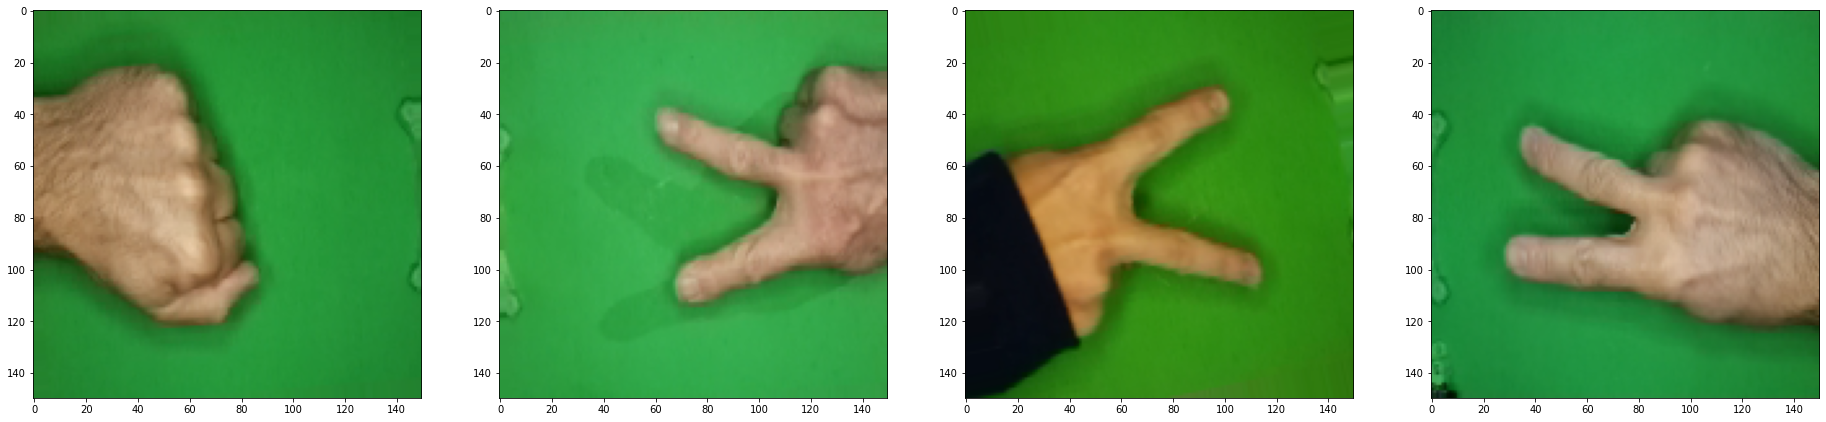

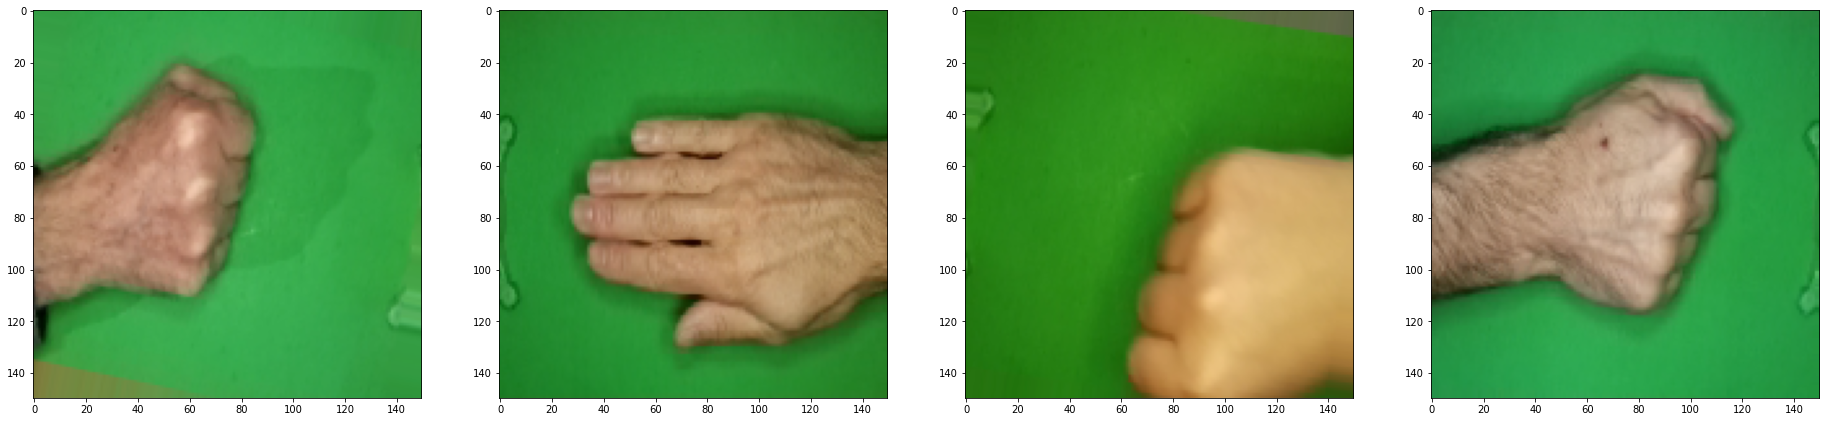

In [146]:
# plot generated image, just to see the result of ImageDataGenerator
plot(training_generated)
plot(validation_generated)

In [147]:
INPUT_SHAPE = (150, 150, 3)
NUM_CLASS = 3

model = Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu',
        input_shape=INPUT_SHAPE
    )
)
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CLASS, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 256)     

In [148]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [149]:
history = model.fit(
    training_generated,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = validation_generated,
    validation_steps = 10,
    verbose = 2
)

Epoch 1/15
20/20 - 40s - loss: 1.0795 - accuracy: 0.3875 - val_loss: 0.9611 - val_accuracy: 0.3688
Epoch 2/15
20/20 - 40s - loss: 0.5851 - accuracy: 0.7125 - val_loss: 0.7038 - val_accuracy: 0.7500
Epoch 3/15
20/20 - 40s - loss: 0.5129 - accuracy: 0.7984 - val_loss: 0.4974 - val_accuracy: 0.8844
Epoch 4/15
20/20 - 40s - loss: 0.3767 - accuracy: 0.8578 - val_loss: 0.5078 - val_accuracy: 0.8344
Epoch 5/15
20/20 - 41s - loss: 0.2452 - accuracy: 0.9250 - val_loss: 0.2752 - val_accuracy: 0.9156
Epoch 6/15
20/20 - 40s - loss: 0.2315 - accuracy: 0.9253 - val_loss: 0.3473 - val_accuracy: 0.8813
Epoch 7/15
20/20 - 39s - loss: 0.2405 - accuracy: 0.9126 - val_loss: 0.2928 - val_accuracy: 0.9281
Epoch 8/15
20/20 - 39s - loss: 0.2464 - accuracy: 0.9300 - val_loss: 0.1968 - val_accuracy: 0.9250
Epoch 9/15
20/20 - 40s - loss: 0.1467 - accuracy: 0.9531 - val_loss: 0.1133 - val_accuracy: 0.9625
Epoch 10/15
20/20 - 39s - loss: 0.1269 - accuracy: 0.9587 - val_loss: 0.1419 - val_accuracy: 0.9656
Epoch 11/

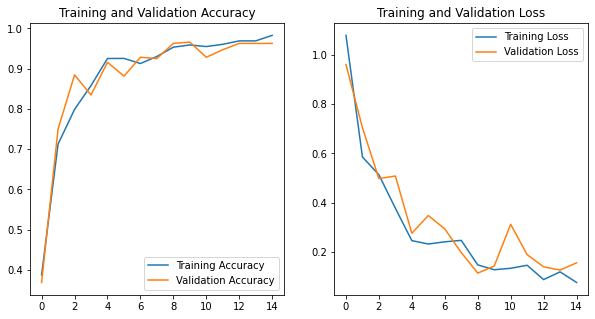

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(15)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [152]:
if not os.path.exists('/tmp/model'):
  os.mkdir('/tmp/model')
model.save('/temp/model/')

INFO:tensorflow:Assets written to: /temp/model/assets


Saving 2NmrcDGkc7FQuu12.png to 2NmrcDGkc7FQuu12.png
[[0. 1. 0.]]
2NmrcDGkc7FQuu12.png
rock


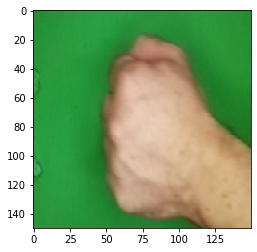

In [159]:
model = tf.keras.models.load_model('/temp/model/')

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')